In [8]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import itertools
import copy
% matplotlib inline

In [9]:
% run network_functions.ipynb

Нарисуем графы на 4 вершинах:

In [10]:
graphs_dict = get_graphs_dict(4, max_edges=True)
signatures = get_all_signatures(graphs_dict)

0 ()
1 (1, 1)
2 (2, 2, 2)
3 (1, 1, 2)
4 (1, 1, 2, 2)
5 (2, 2, 2, 2)
6 (2, 2, 3, 3)
7 (1, 1, 1, 1)
8 (1, 1, 1, 3)
9 (3, 3, 3, 3)
10 (1, 2, 2, 3)


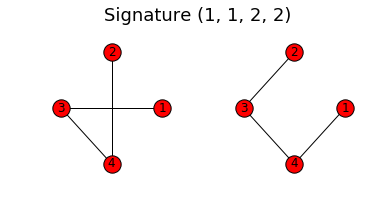

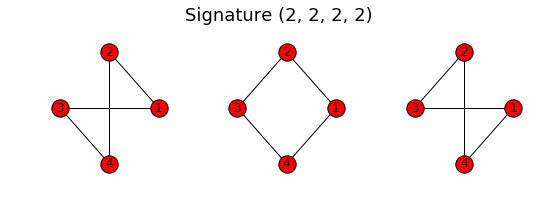

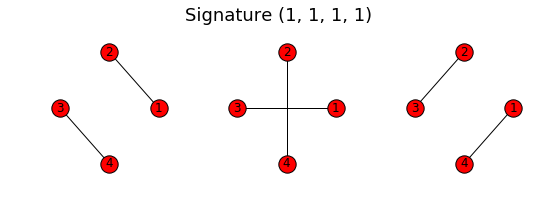

In [11]:
for signature in signatures[4:]:
    plot_graphs_by_signature(signature)

Теперь на пяти:

In [12]:
graphs_dict = get_graphs_dict(5, max_edges=True)
signatures = get_all_signatures(graphs_dict)

0 ()
1 (1, 1)
2 (2, 2, 2)
3 (1, 1, 2)
4 (1, 2, 2, 3)
5 (1, 1, 1, 1)
6 (3, 3, 3, 3)
7 (1, 1, 2, 2)
8 (2, 2, 2, 2)
9 (2, 2, 3, 3)
10 (1, 1, 1, 3)
11 (1, 1, 1, 2, 3)
12 (2, 2, 2, 4, 4)
13 (2, 2, 2, 2, 2)
14 (1, 1, 2, 3, 3)
15 (4, 4, 4, 4, 4)
16 (2, 2, 3, 3, 4)
17 (2, 2, 2, 2, 4)
18 (1, 2, 3, 3, 3)
19 (1, 2, 2, 2, 3)
20 (2, 3, 3, 3, 3)
21 (1, 2, 2, 3, 4)
22 (1, 1, 2, 2, 2)
23 (1, 1, 1, 1, 2)
24 (2, 2, 2, 3, 3)
25 (1, 1, 2, 2, 4)
26 (1, 1, 1, 1, 4)
27 (3, 3, 3, 3, 4)
28 (3, 3, 4, 4, 4)
29 (2, 3, 3, 4, 4)
30 (1, 3, 3, 3, 4)


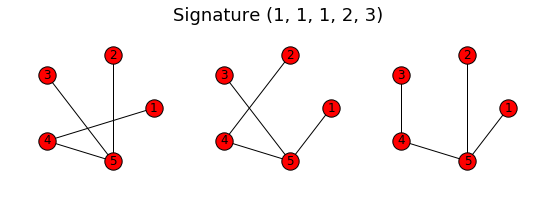

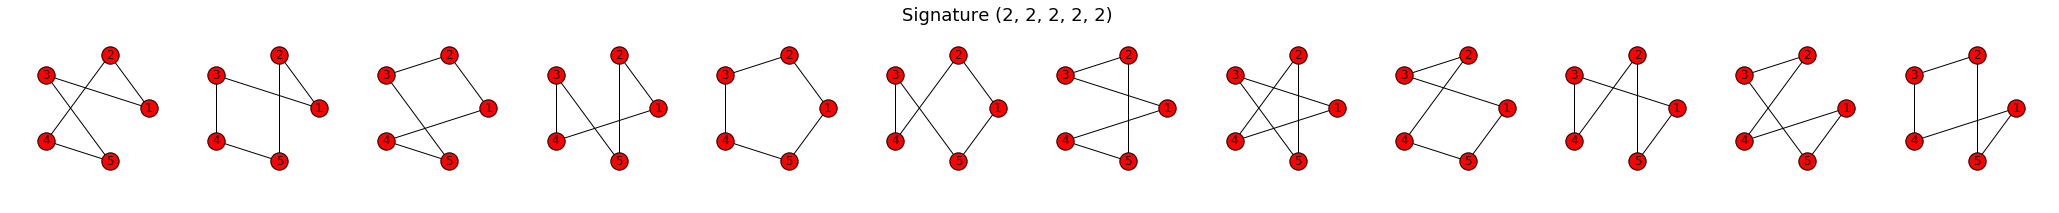

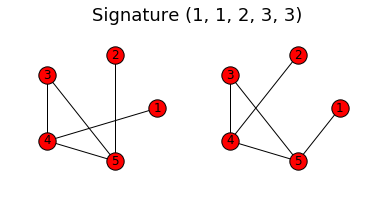

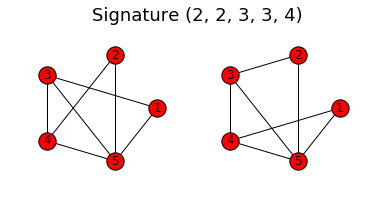

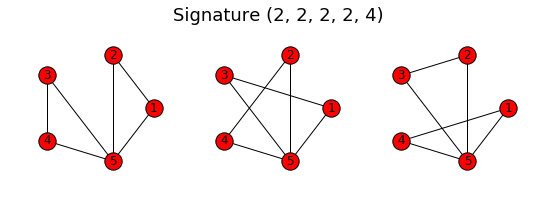

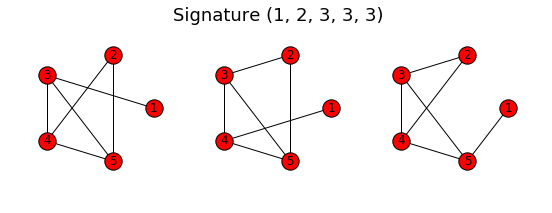

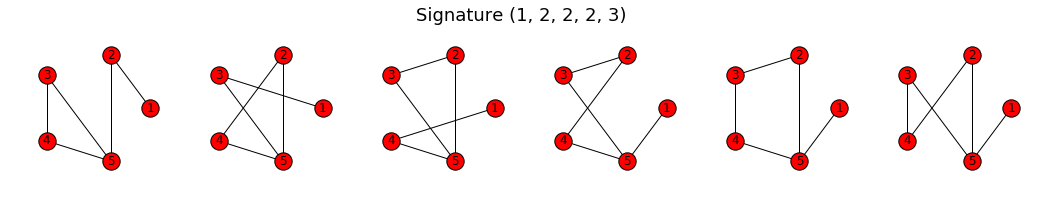

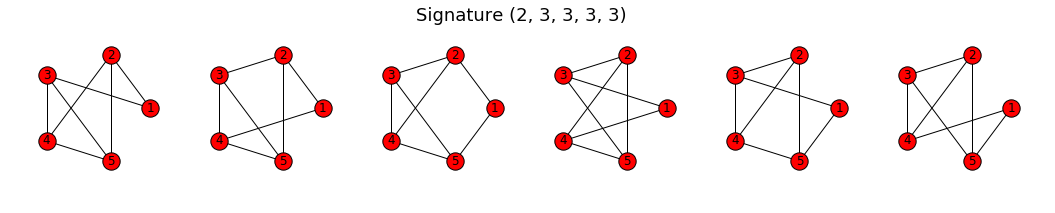

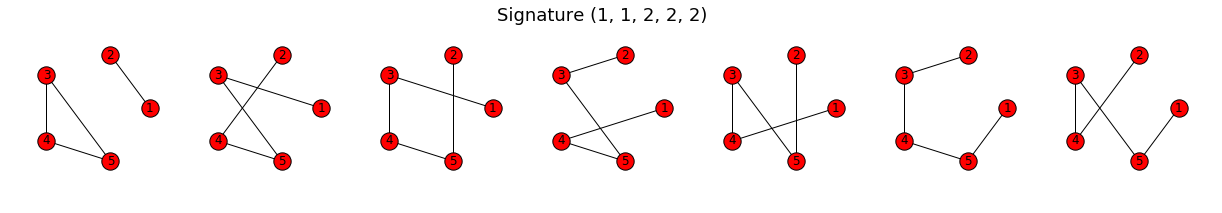

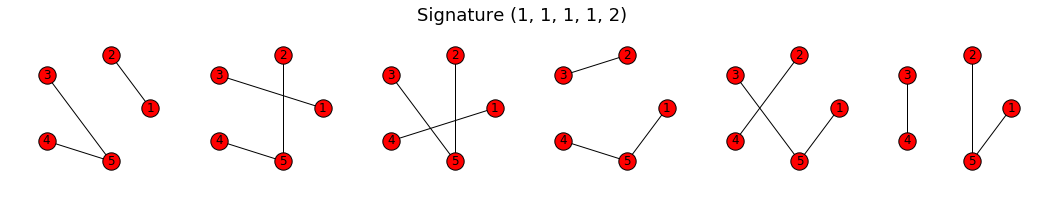

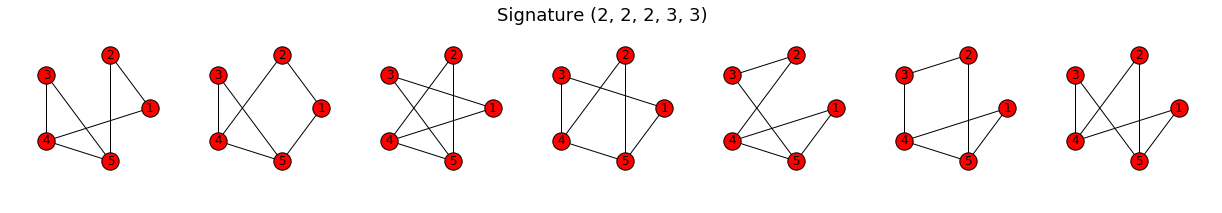

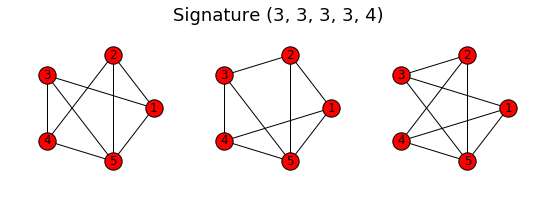

In [13]:
for signature in signatures[11:]:
    plot_graphs_by_signature(signature)

In [14]:
for sgn in signatures[-10:]:
    if len(graphs_dict[sgn]) > 1:
        print("Signature: ", sgn)
        for i, g in enumerate(graphs_dict[sgn]):
            m = get_communication_matrix(g)
            tau = estimate_tau(m, sgn, n_iter=5000)
            norm = np.linalg.norm(m, 2)
            print('   # {}, norm = {:.3f}, tau = {:.3f}'.format(i, norm, tau))

Signature:  (1, 1, 2, 2, 2)
   # 0, norm = 1.000, tau = 0.993
   # 1, norm = 1.012, tau = 0.716
   # 2, norm = 1.012, tau = 0.715
   # 3, norm = 1.012, tau = 0.718
   # 4, norm = 1.012, tau = 0.718
   # 5, norm = 1.012, tau = 0.717
   # 6, norm = 1.012, tau = 0.714
Signature:  (1, 1, 1, 1, 2)
   # 0, norm = 1.028, tau = 1.017
   # 1, norm = 1.028, tau = 1.017
   # 2, norm = 1.028, tau = 1.009
   # 3, norm = 1.028, tau = 1.015
   # 4, norm = 1.028, tau = 1.017
   # 5, norm = 1.028, tau = 1.015
Signature:  (2, 2, 2, 3, 3)
   # 0, norm = 1.010, tau = 0.303
   # 1, norm = 1.010, tau = 0.303
   # 2, norm = 1.010, tau = 0.303
   # 3, norm = 1.010, tau = 0.304
   # 4, norm = 1.010, tau = 0.303
   # 5, norm = 1.010, tau = 0.304
   # 6, norm = 1.025, tau = 0.174
Signature:  (3, 3, 3, 3, 4)
   # 0, norm = 1.005, tau = 0.062
   # 1, norm = 1.005, tau = 0.062
   # 2, norm = 1.005, tau = 0.062


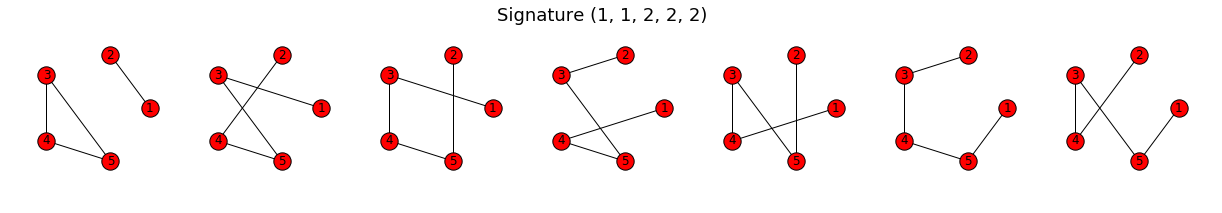

In [15]:
plot_graphs_by_signature((1,1,2,2,2))

In [16]:
% run network_functions.ipynb

In [17]:
sgn = (1,1,2,2,2)
matrices = [get_communication_matrix(g) for g in graphs_dict[sgn]]
for i, matrix in enumerate(matrices):
    #print(matrix)
    norm = np.linalg.norm(M, 2)
    tau = estimate_tau(matrix, n_iter=10000)
    print('   # {}, norm = {:.3f}, tau = {:.3f}'.format(i, norm, tau))

   # 0, norm = 1.000, tau = 0.999
   # 1, norm = 1.000, tau = 0.721
   # 2, norm = 1.000, tau = 0.721
   # 3, norm = 1.000, tau = 0.721
   # 4, norm = 1.000, tau = 0.721
   # 5, norm = 1.000, tau = 0.720
   # 6, norm = 1.000, tau = 0.720


In [18]:
print(np.dot(M.T, M))

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [19]:
print(np.linalg.norm(M, 2))
print(sorted(np.linalg.eigvalsh(np.dot(M.T, M))))

1.0
[1.0, 1.0, 1.0, 1.0, 1.0]


In [20]:
graphs_dict6 = get_graphs_dict(n_nodes=6, max_edges=True)

In [21]:
signatures_six = get_all_signatures(graphs_dict6)

0 ()
1 (1, 1)
2 (1, 1, 2)
3 (2, 2, 2)
4 (3, 3, 3, 3)
5 (1, 1, 2, 2)
6 (1, 1, 1, 3)
7 (2, 2, 3, 3)
8 (1, 1, 1, 1)
9 (2, 2, 2, 2)
10 (1, 2, 2, 3)
11 (1, 1, 1, 2, 3)
12 (2, 2, 2, 2, 2)
13 (1, 2, 3, 3, 3)
14 (1, 1, 2, 2, 2)
15 (2, 3, 3, 4, 4)
16 (2, 2, 2, 4, 4)
17 (2, 2, 3, 3, 4)
18 (1, 2, 2, 3, 4)
19 (2, 2, 2, 3, 3)
20 (1, 1, 2, 2, 4)
21 (3, 3, 3, 3, 4)
22 (1, 3, 3, 3, 4)
23 (1, 1, 2, 3, 3)
24 (4, 4, 4, 4, 4)
25 (1, 2, 2, 2, 3)
26 (1, 1, 1, 1, 2)
27 (2, 2, 2, 2, 4)
28 (2, 3, 3, 3, 3)
29 (1, 1, 1, 1, 4)
30 (3, 3, 4, 4, 4)
31 (2, 2, 3, 3, 5, 5)
32 (1, 1, 1, 1, 2, 2)
33 (3, 3, 4, 4, 4, 4)
34 (1, 1, 2, 2, 2, 2)
35 (5, 5, 5, 5, 5, 5)
36 (3, 4, 4, 4, 4, 5)
37 (4, 4, 4, 4, 4, 4)
38 (1, 1, 2, 2, 4, 4)
39 (1, 2, 2, 2, 4, 5)
40 (1, 1, 1, 1, 2, 4)
41 (3, 3, 3, 3, 3, 5)
42 (1, 1, 1, 1, 1, 5)
43 (1, 1, 3, 3, 3, 5)
44 (2, 2, 3, 4, 4, 5)
45 (3, 3, 3, 4, 4, 5)
46 (3, 3, 3, 3, 3, 3)
47 (2, 2, 3, 3, 3, 3)
48 (4, 4, 5, 5, 5, 5)
49 (4, 4, 4, 4, 5, 5)
50 (1, 3, 3, 3, 3, 3)
51 (1, 1, 3, 3, 3, 3)
52 (1, 4, 4, 4

In [52]:
intersting_sgns = [46, 51, 56, 60, 72]

In [60]:
% run network_functions.ipynb

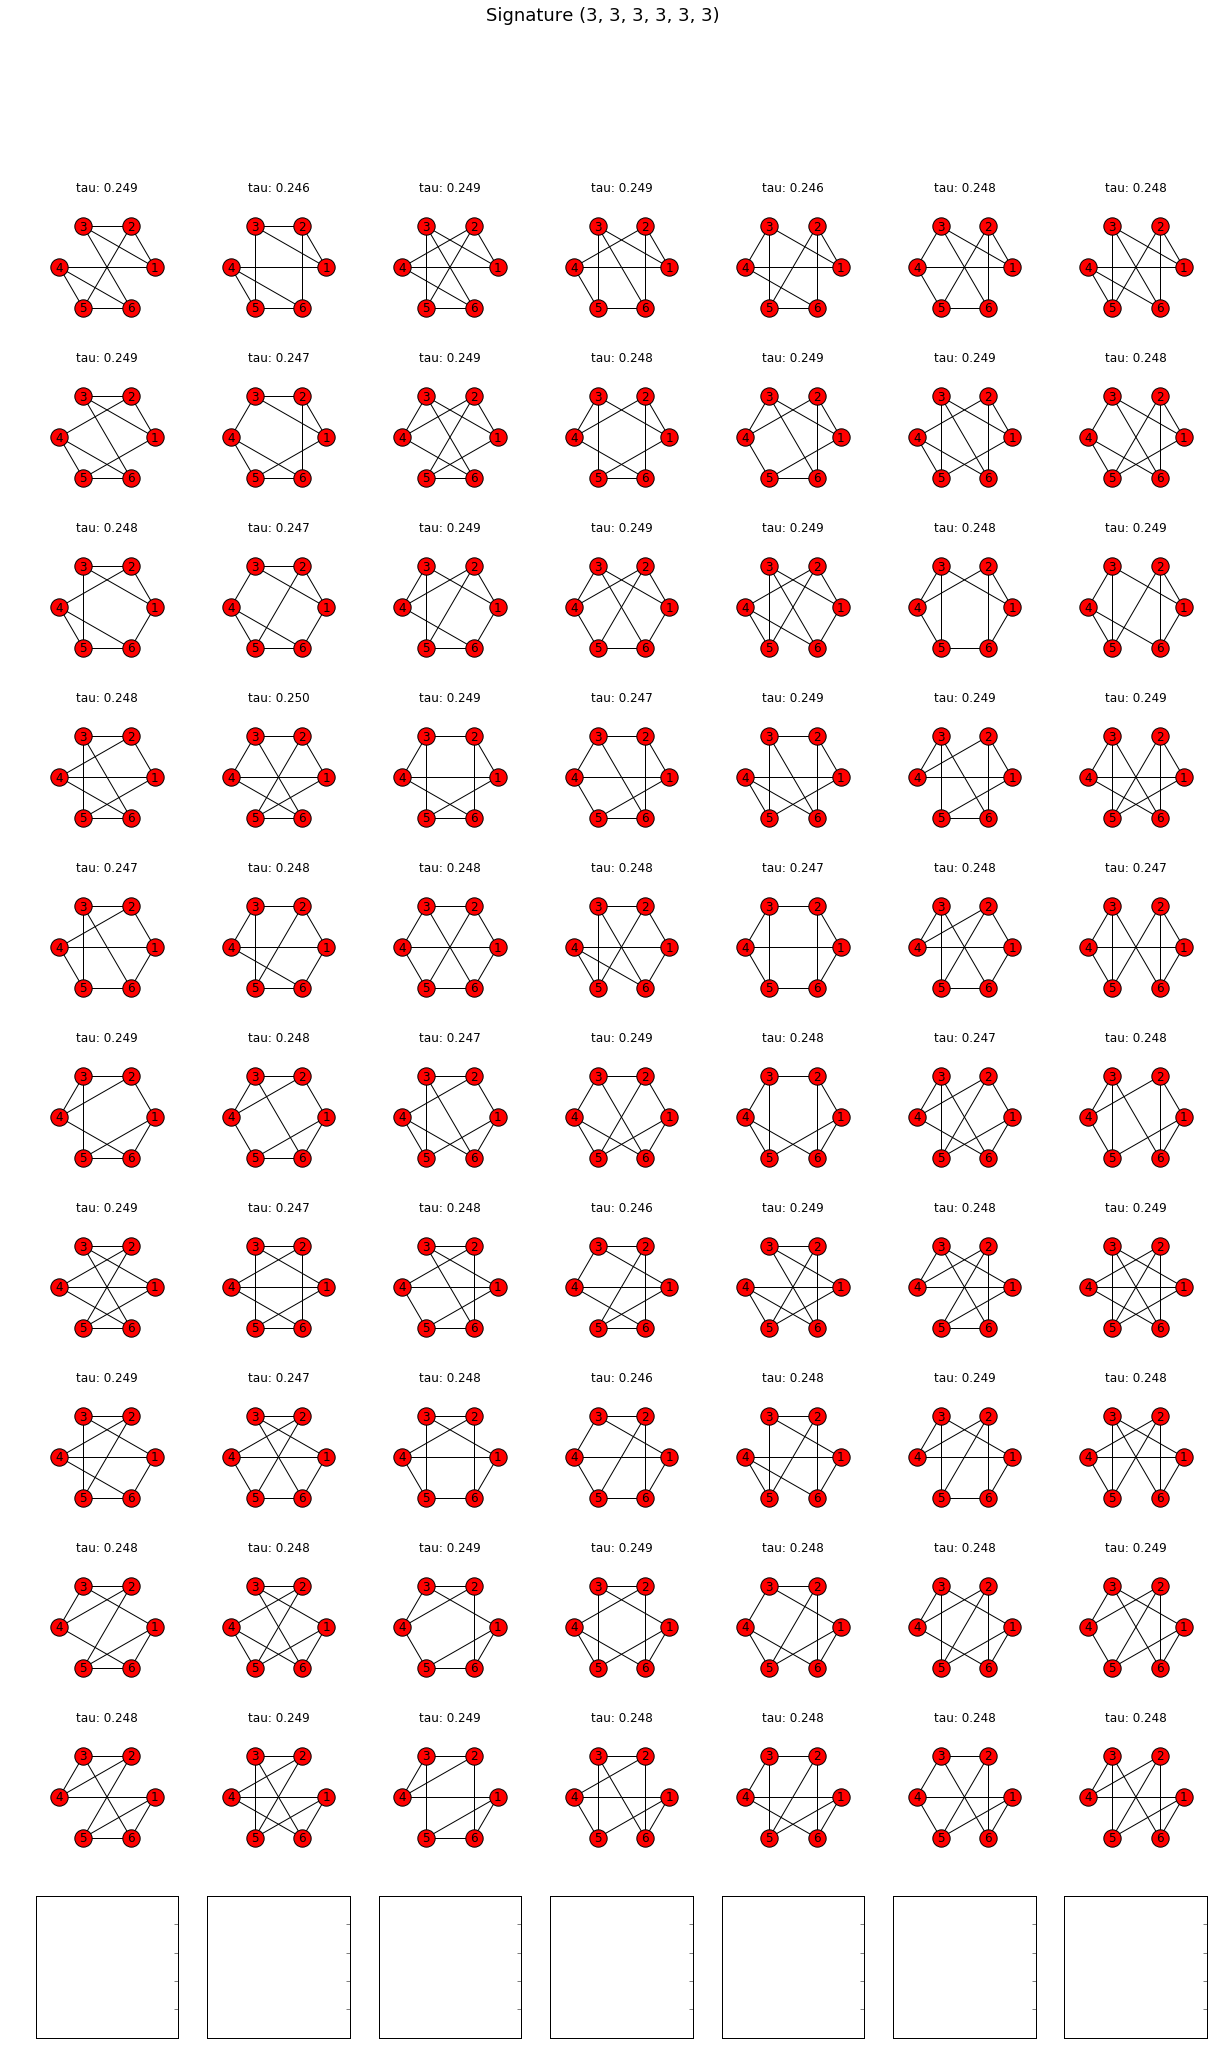

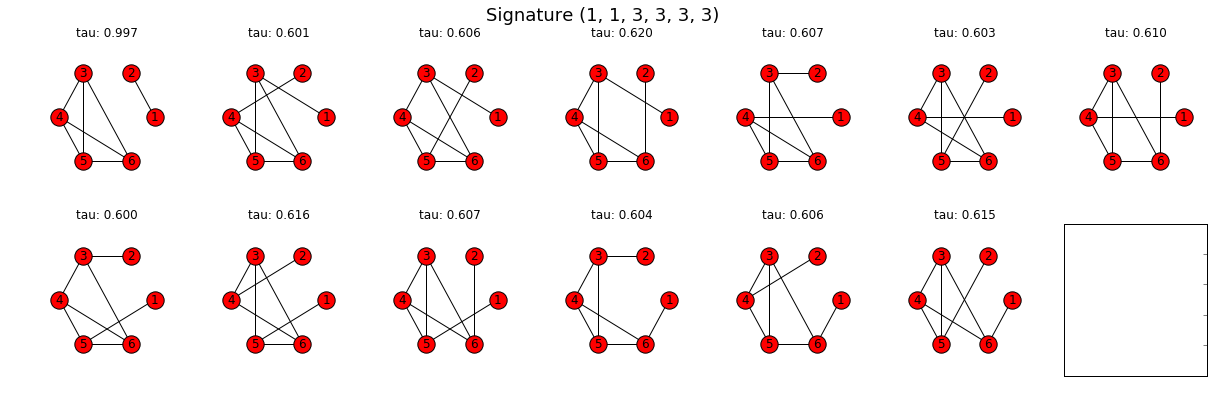

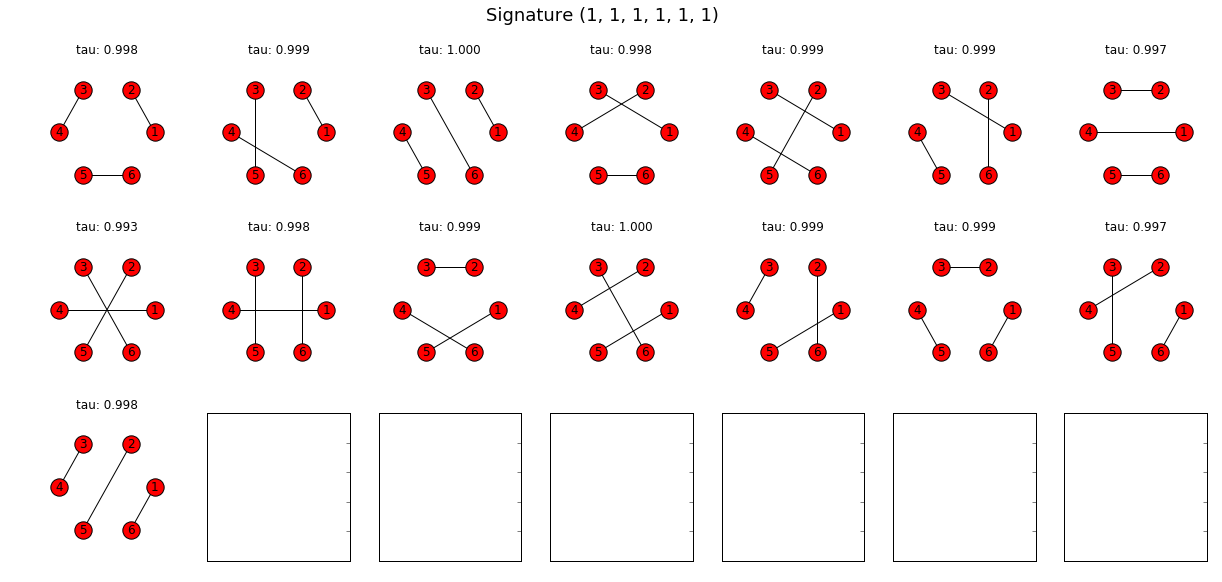

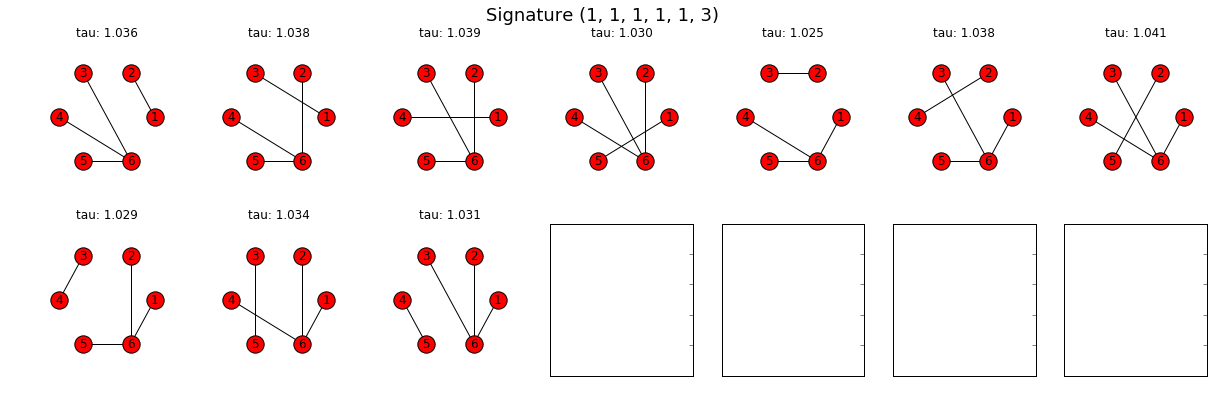

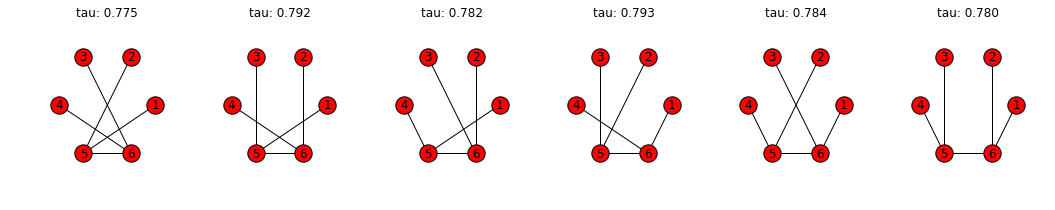

In [61]:
for s in intersting_sgns:
    plot_graphs_by_signature(signatures_six[s], graphs_dict6)

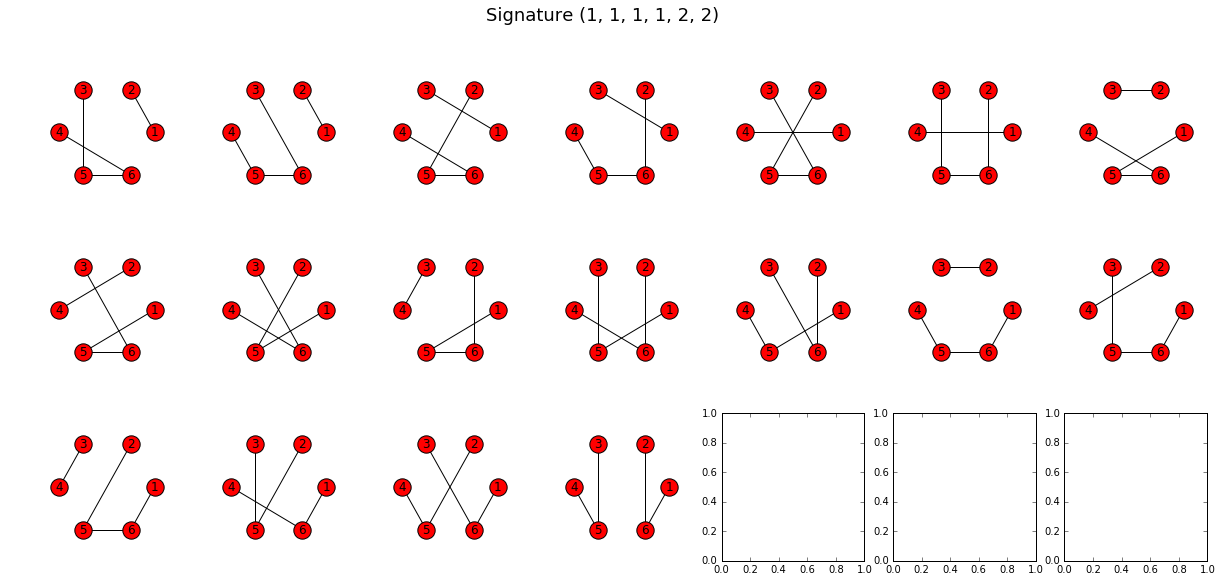

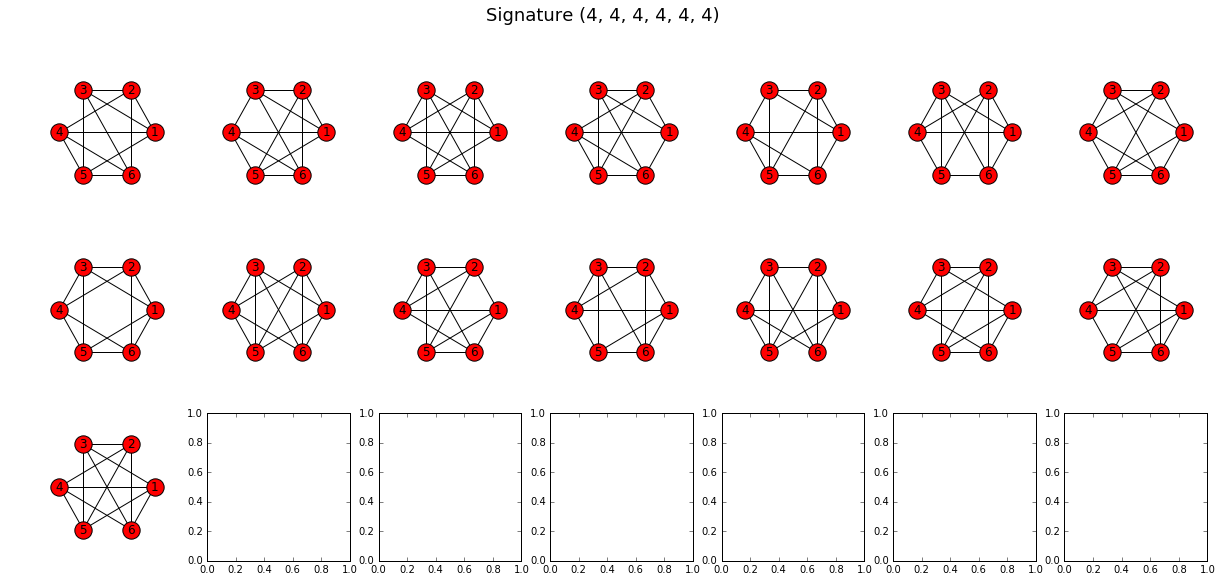

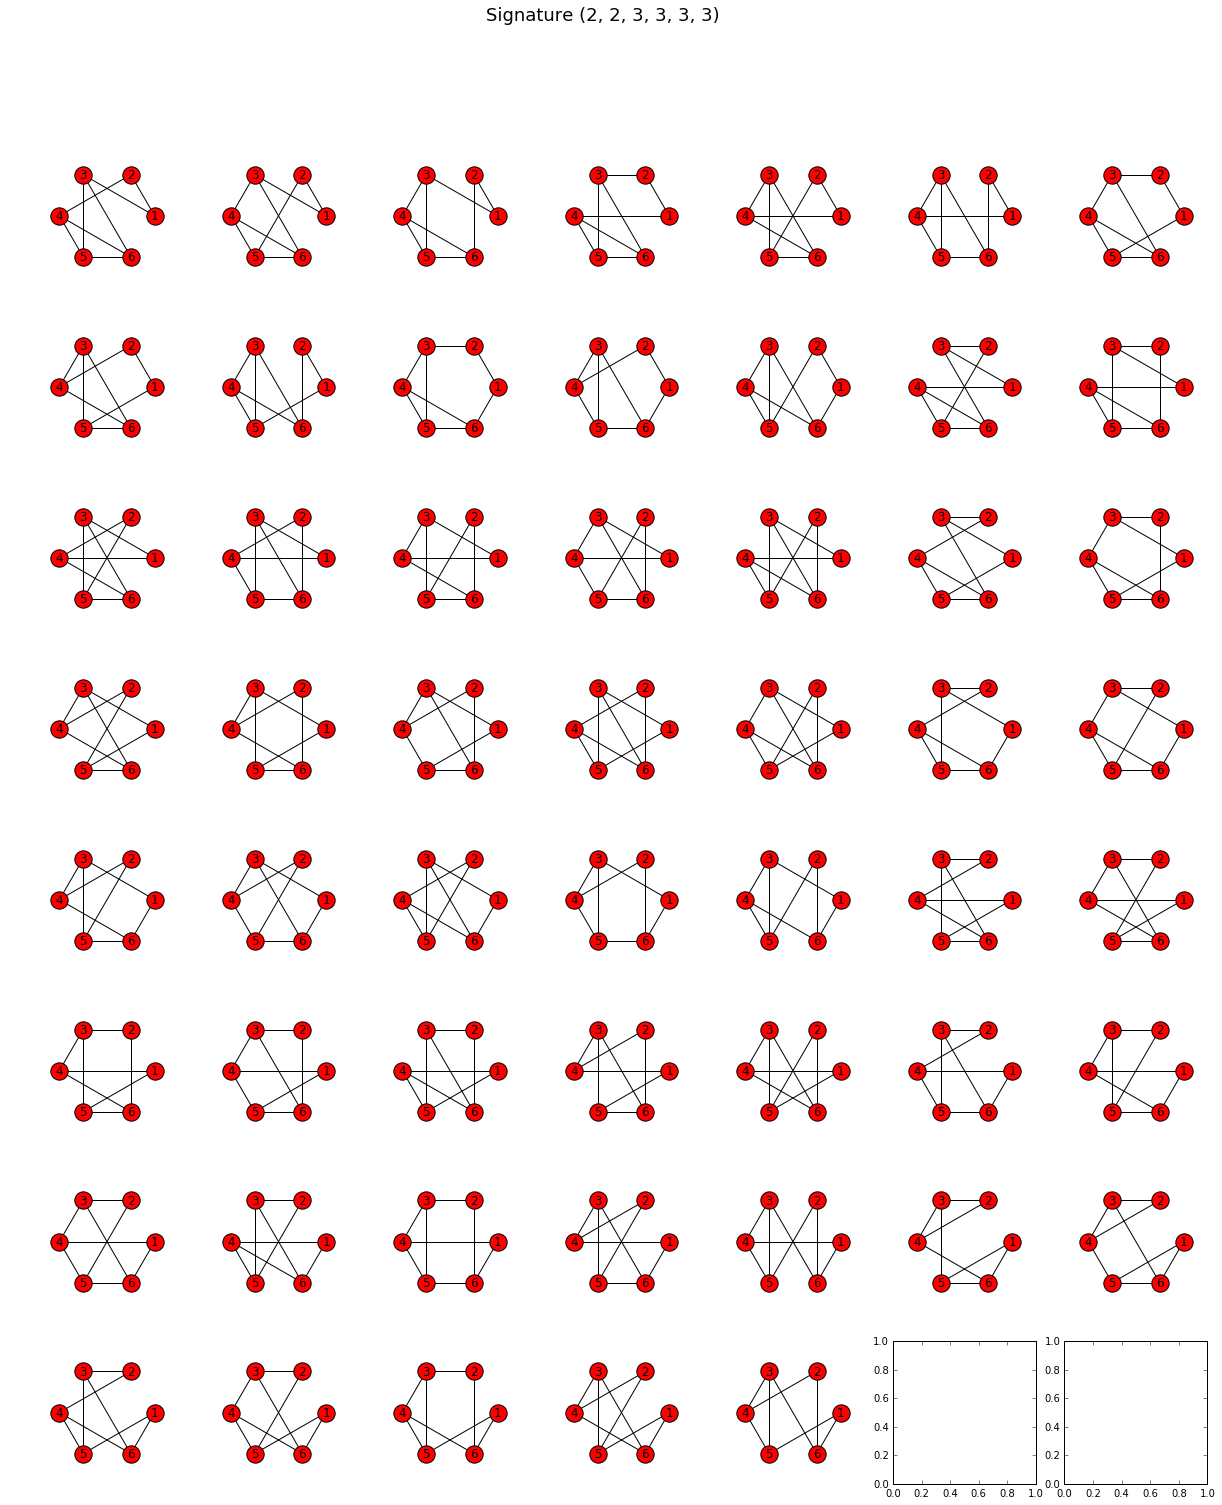

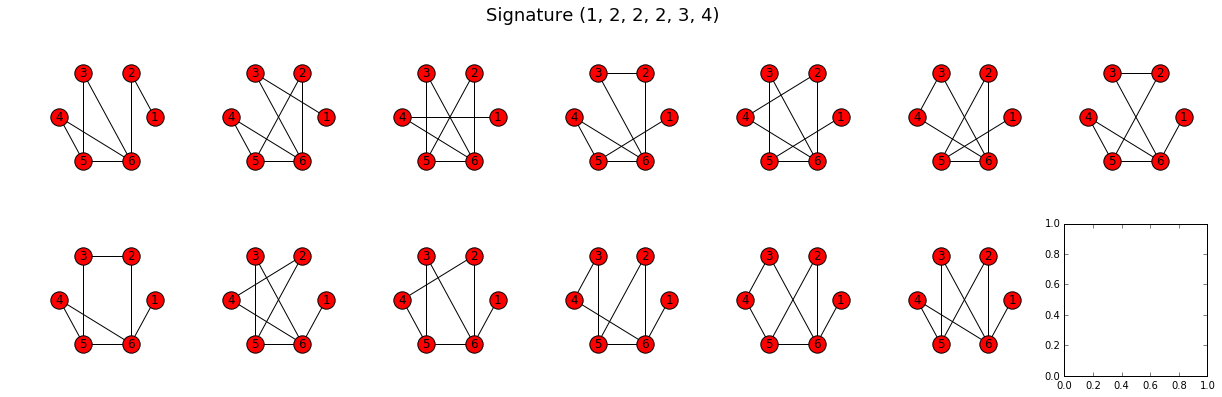

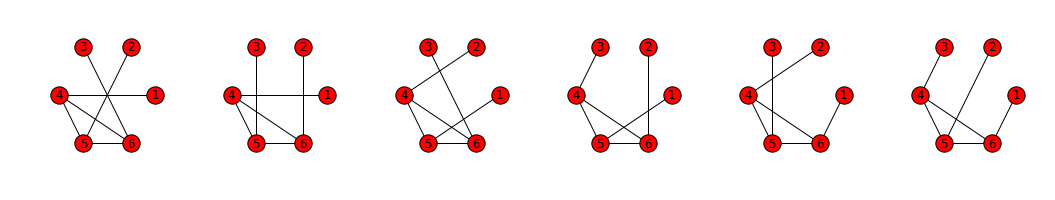

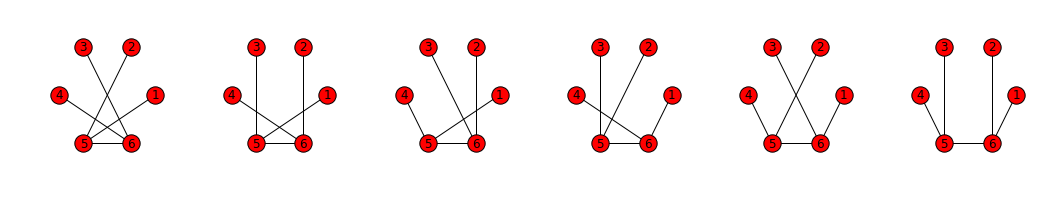

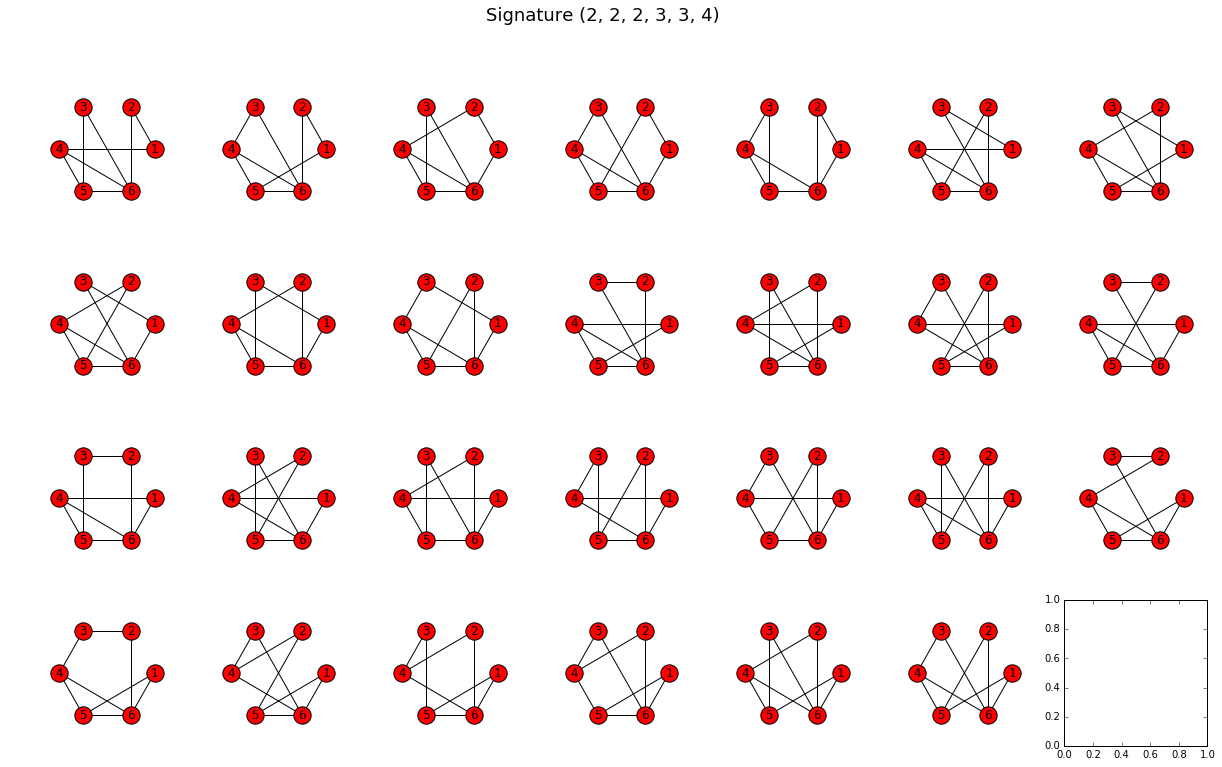

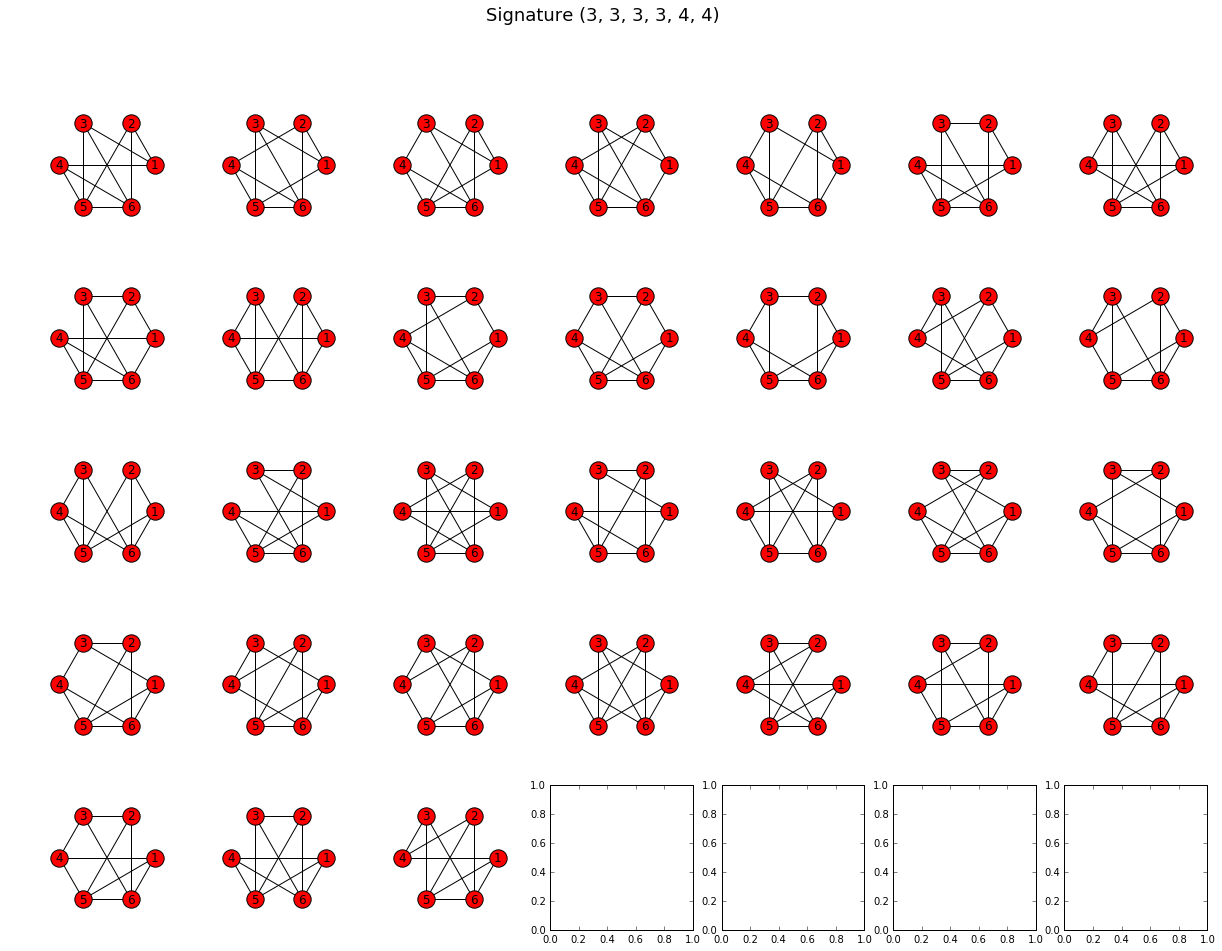

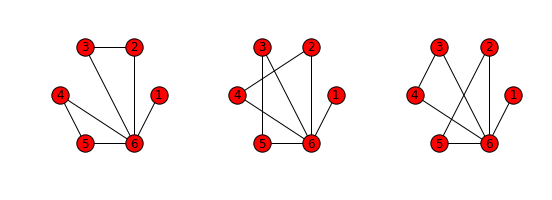

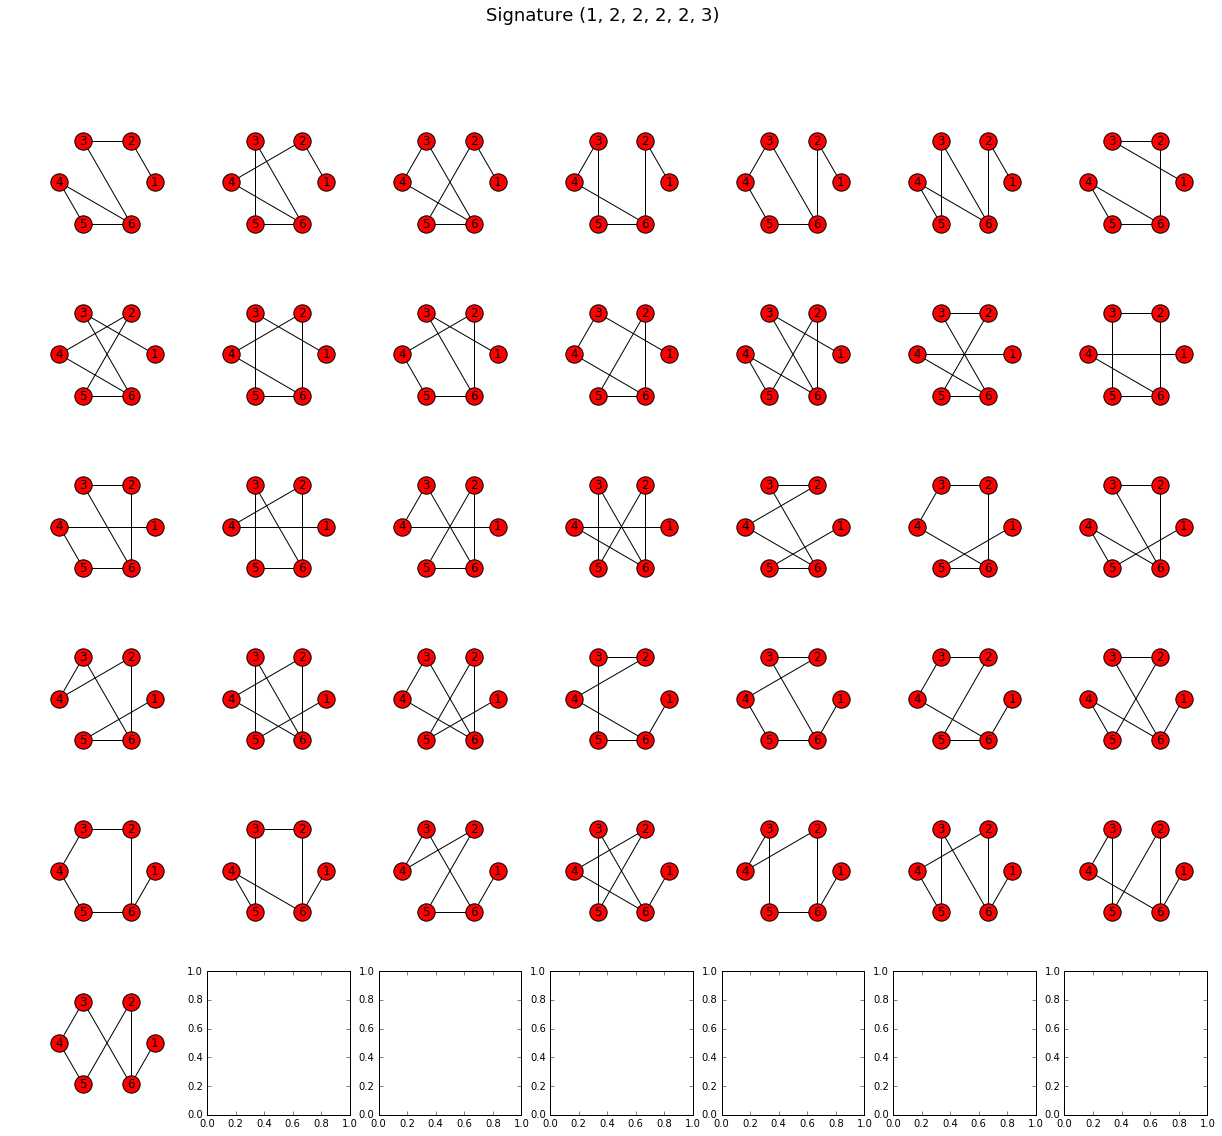

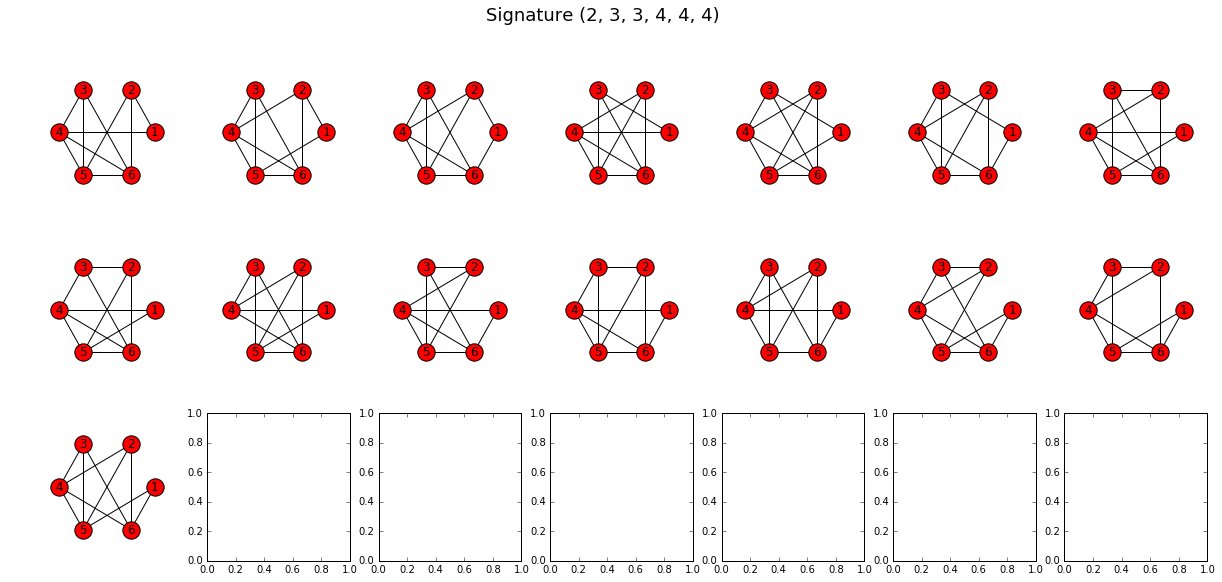

In [41]:
for s in signatures_six[32::5]:
    plot_graphs_by_signature(s, graphs_dict6)

In [25]:
sgn_six = (1, 1, 1, 1, 2, 2)
for i, g in enumerate(graphs_dict6[sgn_six]):
        m = get_communication_matrix(g)
        tau = estimate_tau(m, sgn_six, n_iter=6000)
        norm = np.linalg.norm(m, 2)
        print('   # {}, norm = {:.3f}, tau = {:.3f}'.format(i, norm, tau))

   # 0, norm = 1.014, tau = 0.989
   # 1, norm = 1.014, tau = 0.992
   # 2, norm = 1.014, tau = 1.002
   # 3, norm = 1.014, tau = 1.000
   # 4, norm = 1.014, tau = 1.002
   # 5, norm = 1.014, tau = 0.998
   # 6, norm = 1.014, tau = 1.002
   # 7, norm = 1.014, tau = 0.991
   # 8, norm = 1.028, tau = 1.035
   # 9, norm = 1.014, tau = 0.999
   # 10, norm = 1.028, tau = 1.055
   # 11, norm = 1.028, tau = 1.040
   # 12, norm = 1.014, tau = 1.005
   # 13, norm = 1.014, tau = 0.994
   # 14, norm = 1.014, tau = 1.000
   # 15, norm = 1.028, tau = 1.048
   # 16, norm = 1.028, tau = 1.052
   # 17, norm = 1.028, tau = 1.040


In [56]:
% run network_functions.ipynb

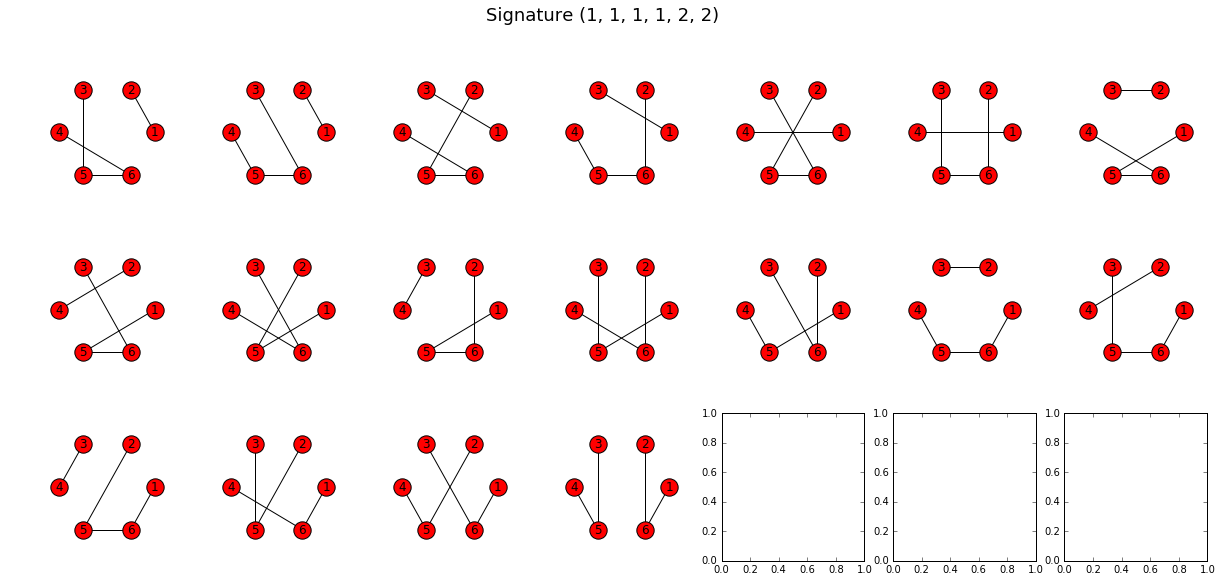

In [33]:
plot_graphs_by_signature(sgn_six, graphs_dict=graphs_dict6)